# Feature and Target Distribution Analysis

This notebook analyzes the distribution of features in relation to target values, focusing on identifying non-Gaussian distributions and unusual patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True

## Load and Explore Dataset

In [10]:
import os

for root, dirs, files in os.walk("."):
    for file in files:
        if file == "train.parquet":
            print("Gefunden:", os.path.join(root, file))



In [12]:
# Load dataset
df = pd.read_parquet('../../data/data/train.parquet')
print(f"Dataset shape: {df.shape}")

# Display first few rows
df.head()

Dataset shape: (2746270, 2415)


,era,data_type,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,...,target_teager2b_20,target_teager2b_60,target_tyler_20,target_tyler_60,target_victor_20,target_victor_60,target_waldo_20,target_waldo_60,target_xerxes_20,target_xerxes_60
id,,,,,,,,,,,,,,,,,,,,,
n0007b5abb0c3a25,0001,train,3,4,0,3,3,1,1,0,...,0.50,0.50,0.25,0.25,0.25,0.25,0.25,0.00,0.25,0.00
n003bba8a98662e4,0001,train,4,2,4,4,0,0,4,4,...,0.50,0.50,0.25,0.25,0.25,0.00,0.25,0.25,0.25,0.25
n003bee128c2fcfc,0001,train,2,4,0,3,0,3,2,4,...,1.00,1.00,1.00,0.75,0.75,0.75,0.75,1.00,0.75,0.75
n0048ac83aff7194,0001,train,2,1,3,0,3,0,3,3,...,0.25,0.25,0.25,0.25,0.50,0.25,0.25,0.25,0.25,0.25
n0055a2401ba6480,0001,train,4,1,4,1,0,4,0,4,...,0.50,0.50,0.25,0.50,0.25,0.50,0.25,0.50,0.25,0.50


In [13]:
# Identify target columns and primary target column
target_cols = [col for col in df.columns if col.startswith('target_')]
feature_cols = [col for col in df.columns if col.startswith('feature_')]

print(f"Number of features: {len(feature_cols)}")
print(f"Number of targets: {len(target_cols)}")

# For simplicity, we'll use a single target column if it exists, or the first target column
if 'target' in df.columns:
    target_col = 'target'
else:
    target_col = target_cols[0]
    
print(f"Using target column: {target_col}")

# Check distribution of target values
target_distribution = df[target_col].value_counts().sort_index()
print("\nTarget value distribution:")
print(target_distribution)

Number of features: 2376
Number of targets: 36
Using target column: target

Target value distribution:
target
0.00     135668
0.25     550995
0.50    1373108
0.75     550373
1.00     136126
Name: count, dtype: int64


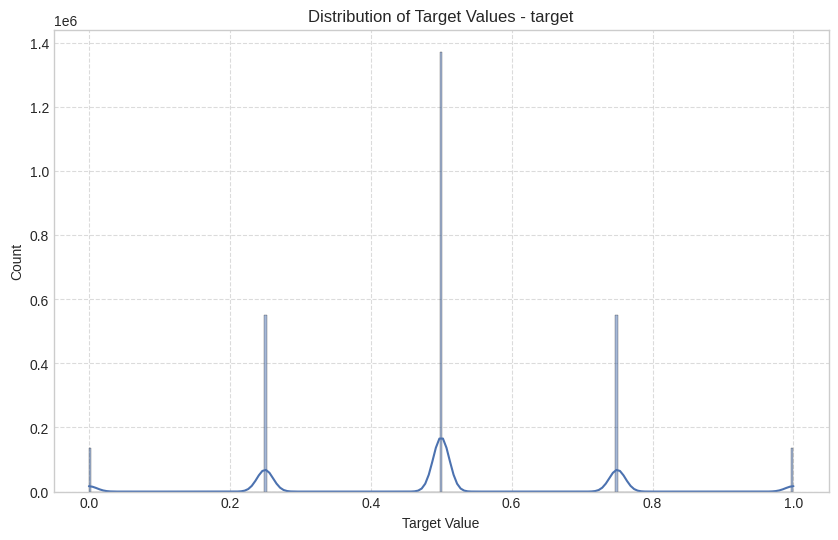

In [14]:
# Visualize target distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[target_col], kde=True)
plt.title(f'Distribution of Target Values - {target_col}')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 1. Feature Distribution Analysis

Let's analyze the distribution of individual features to identify patterns and non-Gaussian distributions.

In [15]:
# Function to check if a distribution is approximately Gaussian
def check_gaussian(feature_series):
    # For large datasets, take a random sample
    sample = feature_series.sample(min(5000, len(feature_series)))
    # Use Shapiro-Wilk test for normality
    stat, p = stats.shapiro(sample)
    return p > 0.05  # Return True if Gaussian (p > 0.05)

# Function to calculate skewness and percentage of zeros
def calculate_distribution_stats(feature_series):
    feature_skew = stats.skew(feature_series)
    zero_pct = (feature_series == 0).mean() * 100
    return feature_skew, zero_pct

In [16]:
# Analyze the first 20 features
sample_features = feature_cols[:20]
feature_stats = []

for feature in sample_features:
    is_gaussian = check_gaussian(df[feature])
    skewness, zero_pct = calculate_distribution_stats(df[feature])
    
    feature_stats.append({
        'Feature': feature.replace('feature_', ''),
        'Is Gaussian': is_gaussian,
        'Zero %': f"{zero_pct:.2f}%",
        'Skewness': f"{skewness:.4f}",
        'Mean': f"{df[feature].mean():.4f}",
        'Std': f"{df[feature].std():.4f}"
    })

# Display results as a DataFrame
distribution_df = pd.DataFrame(feature_stats)
distribution_df

,Feature,Is Gaussian,Zero %,Skewness,Mean,Std
0,shaded_hallucinatory_dactylology,False,20.01%,0.0001,1.9999,1.4144
1,itinerant_hexahedral_photoengraver,False,20.01%,0.0001,1.9999,1.4144
2,prudent_pileate_oven,False,20.01%,0.0001,1.9999,1.4144
3,subalpine_apothegmatical_ajax,False,20.01%,0.0001,1.9999,1.4144
4,pistachio_atypical_malison,False,20.01%,0.0001,1.9999,1.4144
5,symmetrical_spongy_tricentenary,False,20.01%,0.0001,1.9999,1.4144
6,ungrounded_transpontine_winder,False,20.01%,0.0001,1.9999,1.4144
7,aseptic_eely_hemiplegia,False,20.01%,0.0001,1.9999,1.4144
8,elemental_easier_alkalinity,False,20.01%,0.0001,1.9999,1.4144
9,cycloid_zymotic_galloway,False,20.01%,0.0001,1.9999,1.4144


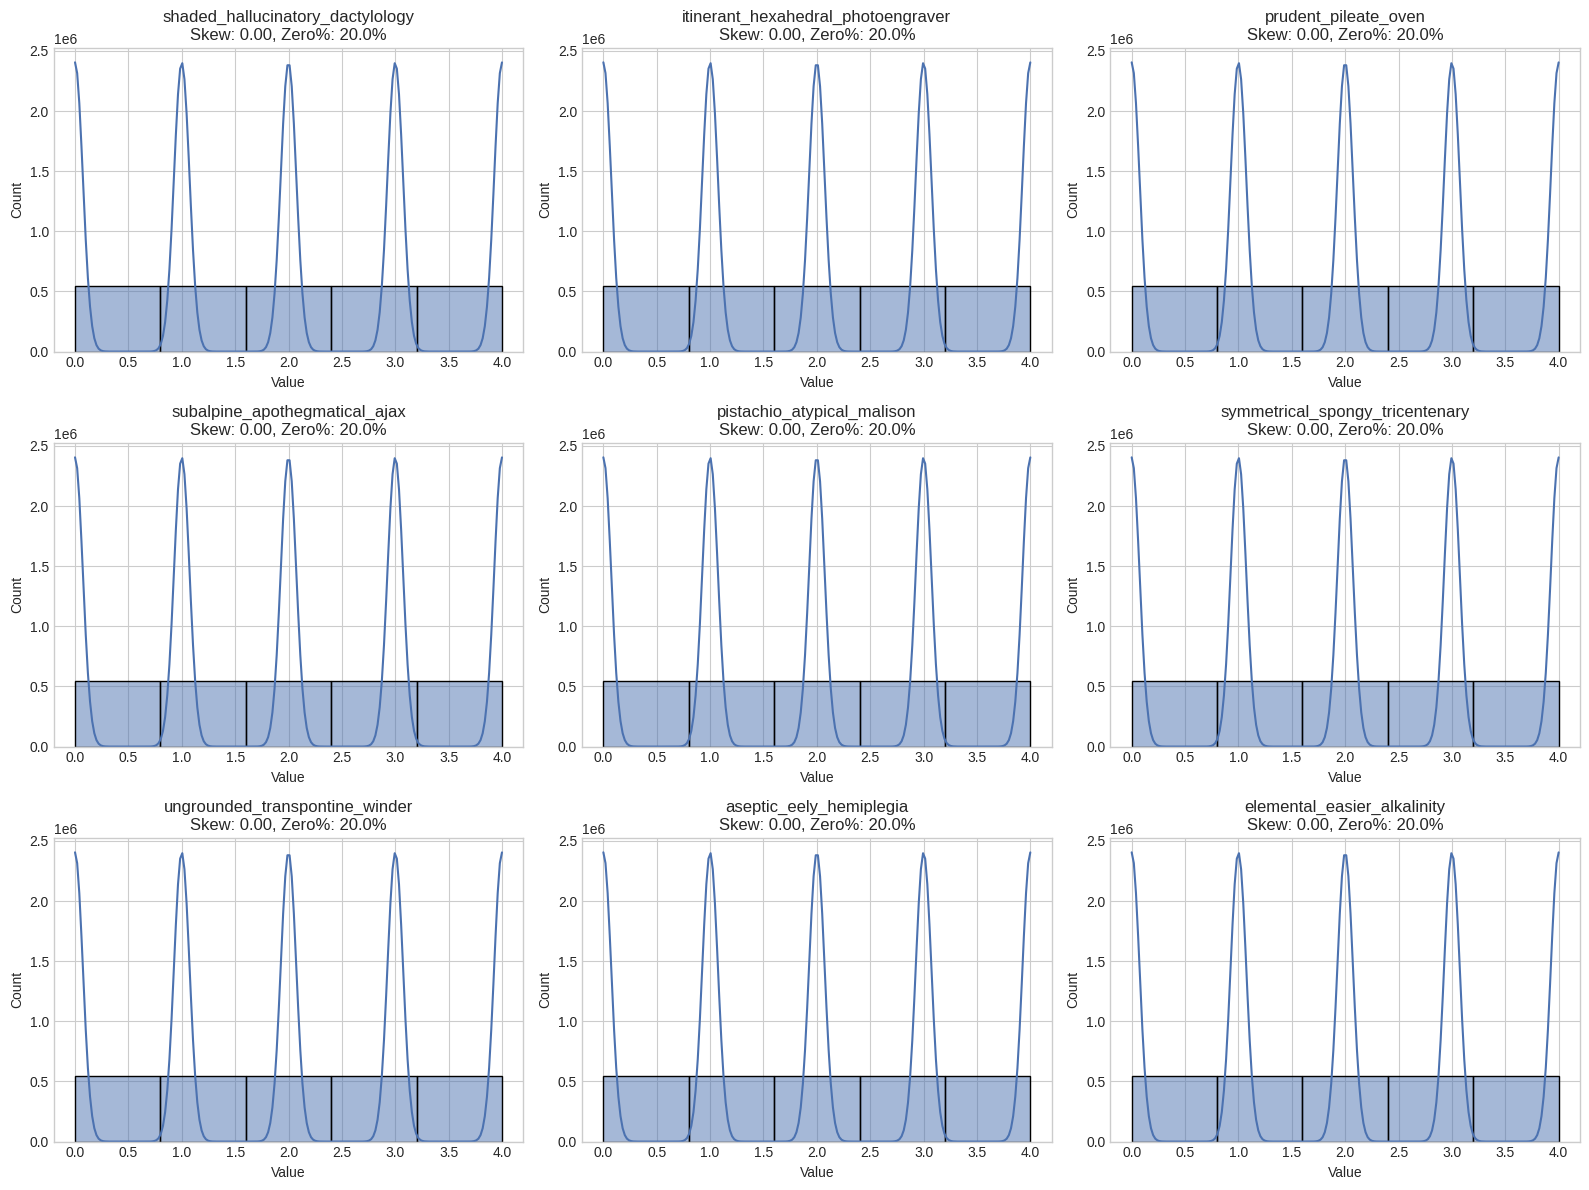

In [17]:
# Visualize distributions of sample features
plt.figure(figsize=(16, 12))

for i, feature in enumerate(sample_features[:9]):  # Show first 9 features
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=min(20, df[feature].nunique()))
    skewness, zero_pct = calculate_distribution_stats(df[feature])
    plt.title(f"{feature.replace('feature_', '')}\nSkew: {skewness:.2f}, Zero%: {zero_pct:.1f}%")
    plt.xlabel('Value')
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()

## 2. Features with Non-Gaussian Distributions

Let's identify and visualize features that deviate from a Gaussian distribution.

In [18]:
# Find features with extreme distributions (high skewness or high percentage of zeros)
extreme_features = []

# Analyze the first 100 features (or all if less than 100)
features_to_check = feature_cols[:min(100, len(feature_cols))]

for feature in features_to_check:
    skewness, zero_pct = calculate_distribution_stats(df[feature])
    
    # Consider a feature extreme if it has high skewness or many zeros
    if abs(skewness) > 1.0 or zero_pct > 30:
        extreme_features.append({
            'Feature': feature,
            'Skewness': skewness,
            'Zero %': zero_pct,
            'Mean': df[feature].mean(),
            'Std': df[feature].std()
        })

# Sort by skewness (absolute value)
extreme_features.sort(key=lambda x: abs(x['Skewness']), reverse=True)

# Display extreme features
if extreme_features:
    extreme_df = pd.DataFrame(extreme_features)
    print(f"Found {len(extreme_df)} features with non-Gaussian distributions")
    extreme_df.head(10)  # Show top 10
else:
    print("No features with extreme distributions found")

No features with extreme distributions found


In [19]:
# Visualize the most non-Gaussian features
if extreme_features:
    plt.figure(figsize=(16, 10))
    for i, feature_data in enumerate(extreme_features[:6]):  # Top 6 most extreme features
        feature = feature_data['Feature']
        plt.subplot(2, 3, i+1)
        sns.histplot(df[feature], kde=True, bins=min(20, df[feature].nunique()))
        plt.title(f"{feature.replace('feature_', '')}\nSkew: {feature_data['Skewness']:.2f}, Zero%: {feature_data['Zero %']:.1f}%")
        plt.xlabel('Value')
        plt.ylabel('Count')
        
    plt.tight_layout()
    plt.show()

## 3. Relationship Between Features and Target

Now let's analyze how feature distributions vary with different target values.

In [20]:
# Calculate correlation between features and target
# Select a sample of features to keep visualization manageable
if len(feature_cols) > 20:
    correlation_features = feature_cols[:20] 
else:
    correlation_features = feature_cols

# Calculate correlations
correlation_df = df[correlation_features + [target_col]].corr()

# Get correlation with target only
target_correlation = correlation_df[target_col].drop(target_col).sort_values(ascending=False)

print("Top features correlated with target:")
print(target_correlation.head(10))
print("\nBottom features correlated with target:")
print(target_correlation.tail(10))

Top features correlated with target:
feature_sassy_coseismic_deadlock              0.002630
feature_paracelsian_capable_cosmography       0.001144
feature_subalpine_apothegmatical_ajax         0.001120
feature_shaded_hallucinatory_dactylology      0.000758
feature_itinerant_hexahedral_photoengraver    0.000457
feature_elemental_easier_alkalinity           0.000413
feature_symmetrical_spongy_tricentenary       0.000329
feature_eliminative_social_remonetization     0.000157
feature_fatalistic_brooding_fitzgerald       -0.000109
feature_prudent_pileate_oven                 -0.000114
Name: target, dtype: float64

Bottom features correlated with target:
feature_ungrounded_transpontine_winder             -0.000383
feature_zincy_cirrhotic_josh                       -0.000446
feature_untidier_cherished_abbacy                  -0.000718
feature_cycloid_zymotic_galloway                   -0.000829
feature_pistachio_atypical_malison                 -0.001013
feature_sprucest_alsatian_shade       

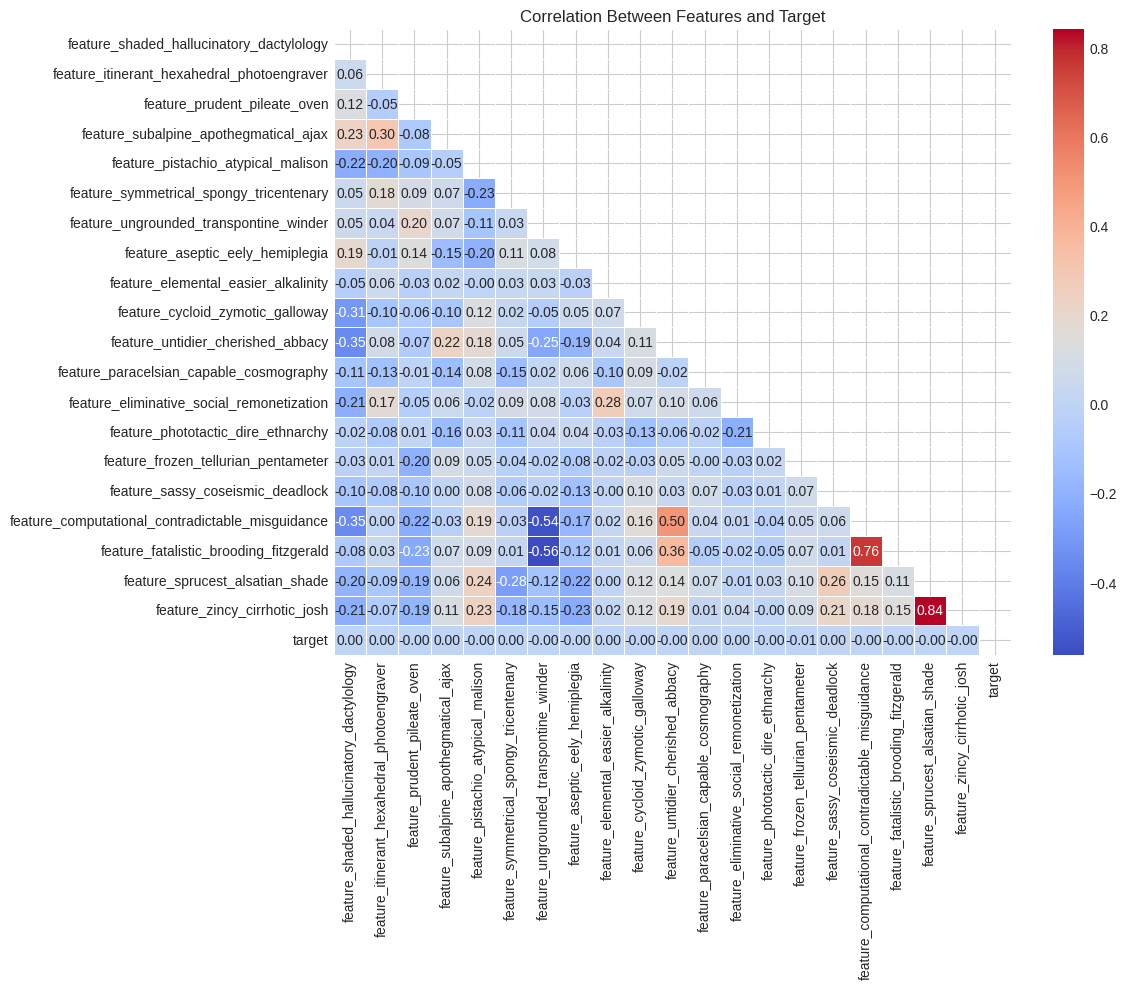

In [21]:
# Visualize correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(correlation_df.corr())
sns.heatmap(
    correlation_df, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5,
    mask=mask
)
plt.title('Correlation Between Features and Target')
plt.tight_layout()
plt.show()

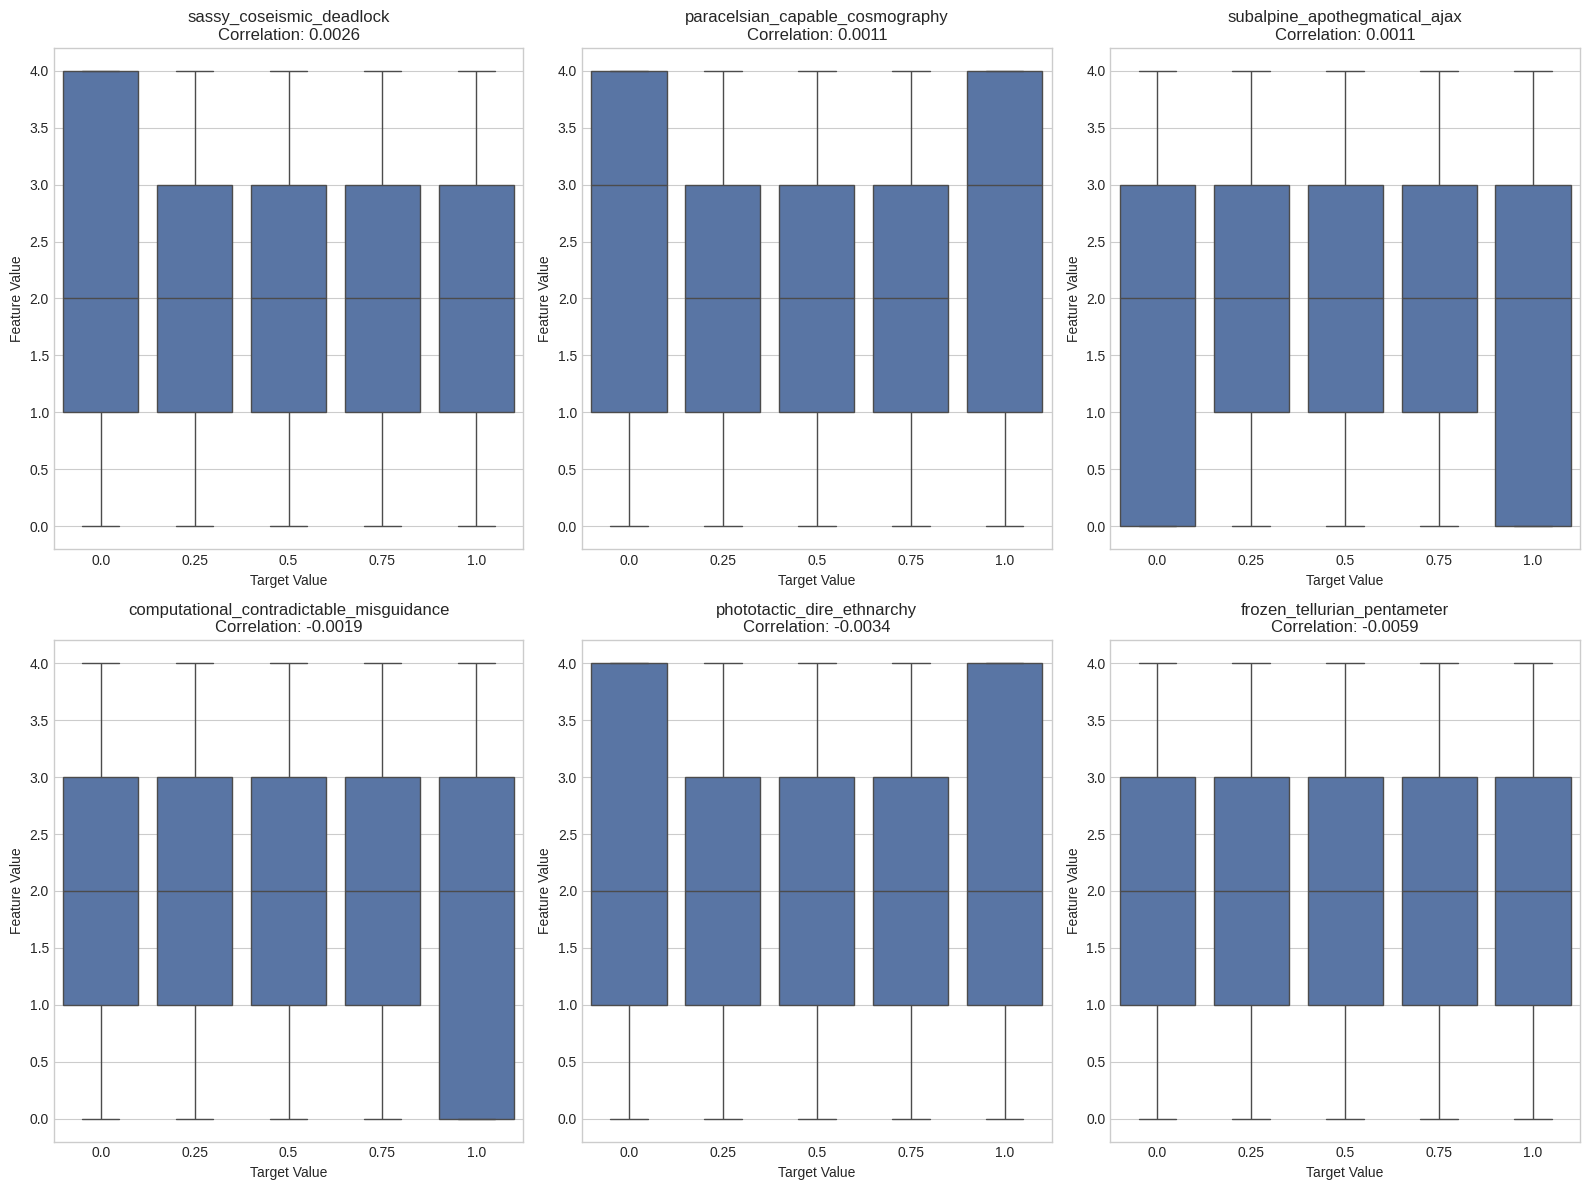

In [24]:
# Select top 3 most correlated features (positive and negative)
top_positive = target_correlation.head(3).index.tolist()
top_negative = target_correlation.tail(3).index.tolist()
top_correlated = top_positive + top_negative

# Create box plots to show distribution by target value
plt.figure(figsize=(16, 12))

for i, feature in enumerate(top_correlated):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=target_col, y=feature, data=df)
    plt.title(f"{feature.replace('feature_', '')}\nCorrelation: {target_correlation[feature]:.4f}")
    plt.xlabel('Target Value')
    plt.ylabel('Feature Value')
    
plt.tight_layout()
plt.show()

## 4. Visualizing Feature Distributions by Target Value

Let's examine how the most interesting features are distributed across different target values.

In [27]:
# Function to plot feature distribution by target value
def plot_feature_by_target(feature):
    plt.figure(figsize=(14, 6))
    
    # KDE plot - distribution by target value
    plt.subplot(1, 2, 1)
    for target_val in sorted(df[target_col].unique()):
        subset = df[df[target_col] == target_val][feature]
        sns.kdeplot(subset, label=f'Target={target_val}')
    
    plt.title(f'Distribution of {feature.replace("feature_", "")}\nby Target Value')
    plt.xlabel('Feature Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Violin plot
    plt.subplot(1, 2, 2)
    sns.violinplot(x=target_col, y=feature, data=df, inner="quartile")
    plt.title(f'Violin Plot of {feature.replace("feature_", "")}\nby Target Value')
    
    plt.tight_layout()
    plt.show()

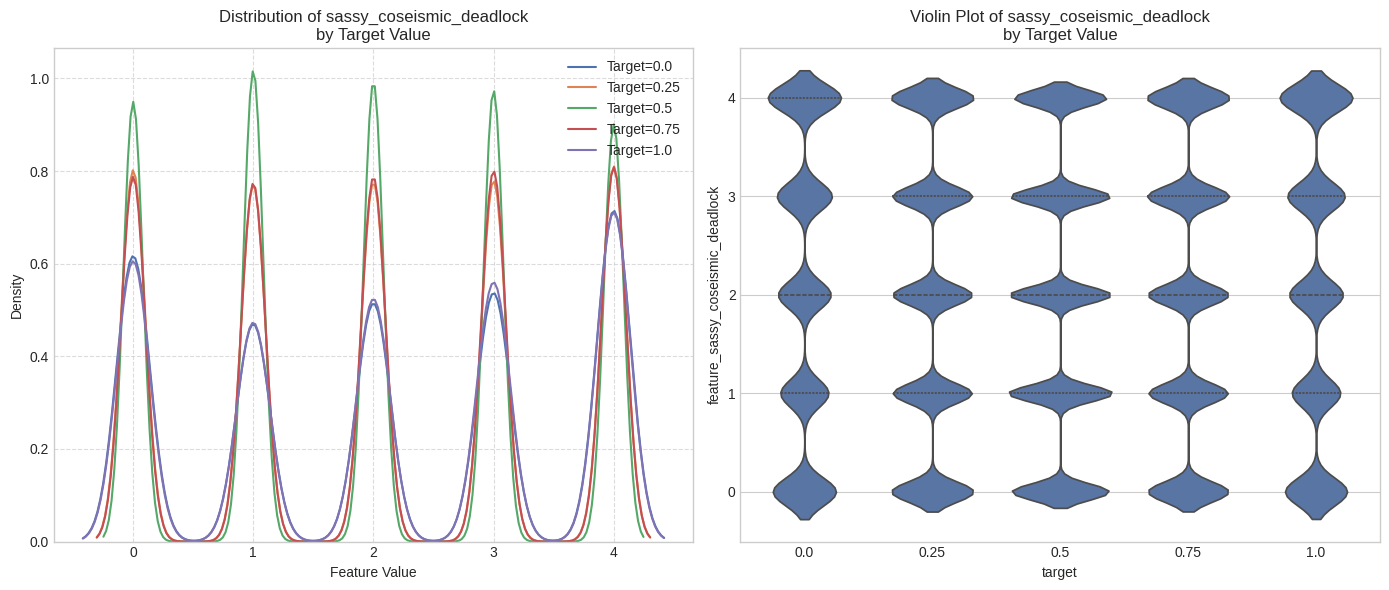

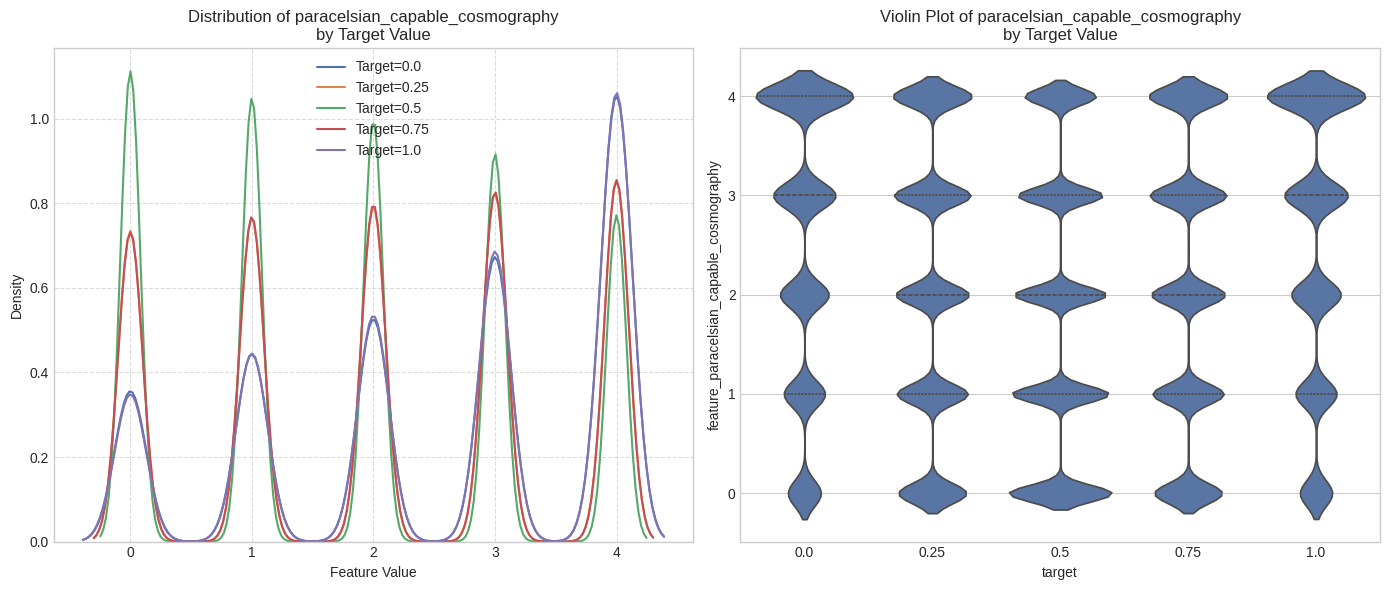

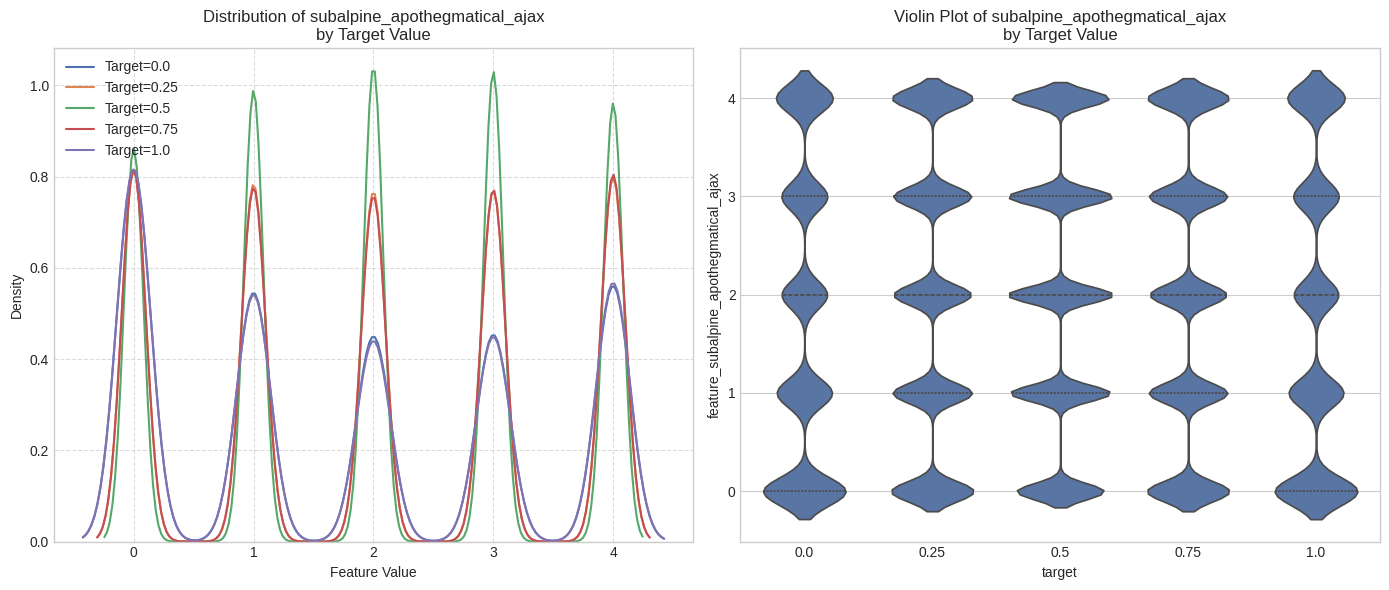

In [28]:
# Analyze top correlated features
for feature in top_correlated[:3]:  # Analyze top 3
    plot_feature_by_target(feature)

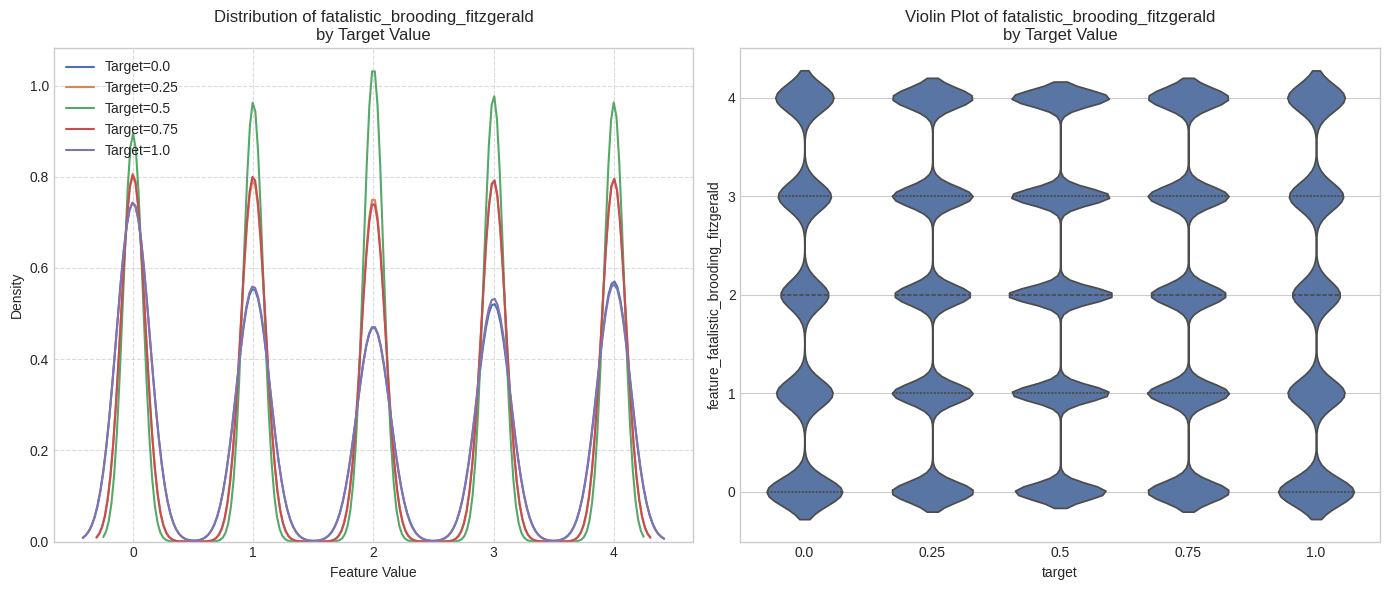

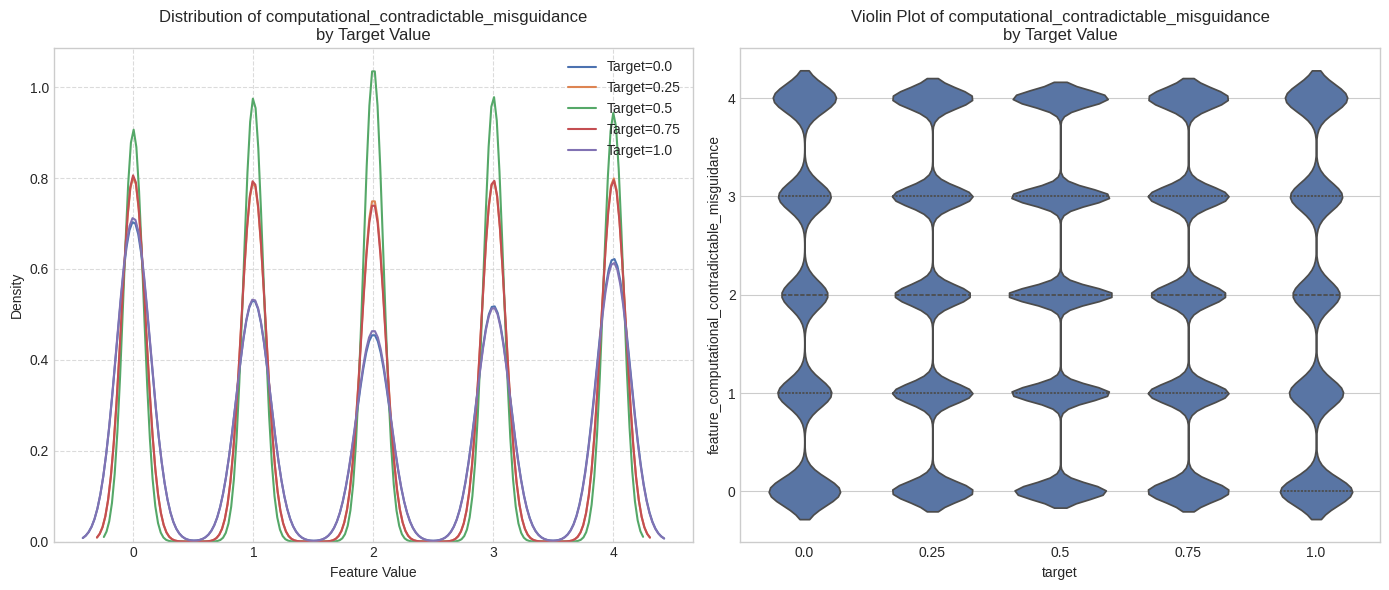

In [29]:
# Liste der interessanten Features
features_to_plot = [
    'feature_fatalistic_brooding_fitzgerald',
    'feature_computational_contradictable_misguidance'
]

# Plots erzeugen
for feature in features_to_plot:
    plot_feature_by_target(feature)


In [15]:
# Let's also look at features with high percentage of zeros
if extreme_features:
    # Sort by zero percentage
    zero_features = sorted(extreme_features, key=lambda x: x['Zero %'], reverse=True)
    
    for feature_data in zero_features[:3]:  # Analyze top 3
        feature = feature_data['Feature']
        plot_feature_by_target(feature)

## 5. Feature Value Distribution Across All Features

Let's examine the general pattern of feature values across all features.

In [16]:
# Create a dataframe to hold aggregated statistics about feature distributions
feature_meta = []

# Only analyze a subset if there are many features
features_to_analyze = feature_cols[:min(500, len(feature_cols))]

for feature in features_to_analyze:
    skewness, zero_pct = calculate_distribution_stats(df[feature])
    
    feature_meta.append({
        'Feature': feature,
        'Zero %': zero_pct,
        'Mean': df[feature].mean(),
        'Median': df[feature].median(),
        'Std': df[feature].std(),
        'Skewness': skewness,
        'Target Correlation': df[[feature, target_col]].corr().iloc[0, 1]
    })

feature_meta_df = pd.DataFrame(feature_meta)

# Show summary statistics
feature_meta_df.describe()

,Zero %,Mean,Median,Std,Skewness,Target Correlation
count,500.000000,500.000000,500.0,500.000000,500.000000,500.000000
mean,19.973844,1.999915,2.0,1.413037,0.000060,0.002002
std,0.444433,0.000002,0.0,0.017035,0.000004,0.003579
min,14.259195,1.999915,2.0,1.193998,0.000010,-0.010334
25%,20.008339,1.999915,2.0,1.414359,0.000060,-0.000191
50%,20.008339,1.999915,2.0,1.414359,0.000060,0.001670
75%,20.008339,1.999915,2.0,1.414359,0.000060,0.004079
max,20.008339,1.999940,2.0,1.414359,0.000060,0.011209


MemoryError: Unable to allocate 9.33 PiB for an array with shape (1312803225488329,) and data type float64

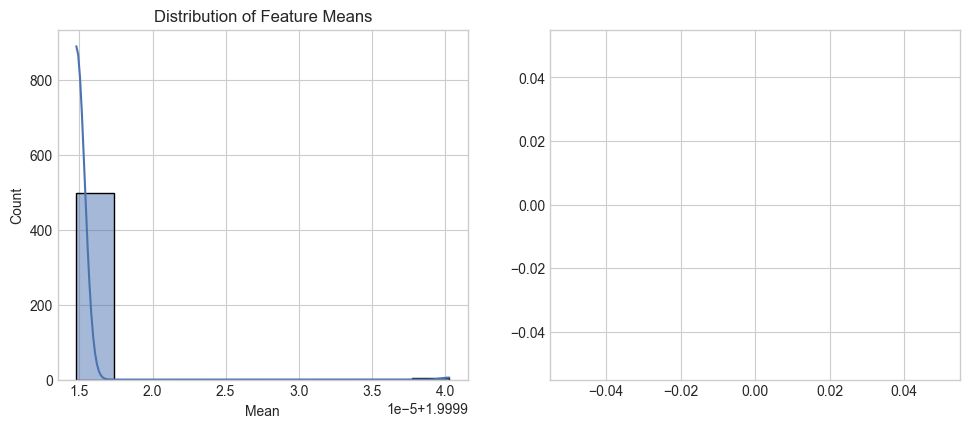

In [17]:
# Visualize distribution of feature properties
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.histplot(feature_meta_df['Mean'], kde=True)
plt.title('Distribution of Feature Means')

plt.subplot(2, 3, 2)
sns.histplot(feature_meta_df['Std'], kde=True)
plt.title('Distribution of Feature Standard Deviations')

plt.subplot(2, 3, 3)
sns.histplot(feature_meta_df['Skewness'], kde=True)
plt.title('Distribution of Feature Skewness')

plt.subplot(2, 3, 4)
sns.histplot(feature_meta_df['Zero %'], kde=True)
plt.title('Distribution of Zero Percentages')

plt.subplot(2, 3, 5)
sns.histplot(feature_meta_df['Target Correlation'].abs(), kde=True)
plt.title('Distribution of |Target Correlation|')

plt.subplot(2, 3, 6)
sns.scatterplot(x='Skewness', y='Zero %', data=feature_meta_df, alpha=0.6)
plt.title('Skewness vs. Zero Percentage')
plt.axhline(y=20, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

## 6. Conclusion and Feature Recommendations

Based on our analysis, here's a summary of the feature distributions and their relationship with target values.

In [18]:
# Identify features with non-Gaussian distributions and high correlation with target
high_correlation_threshold = 0.1
high_skew_threshold = 0.5
high_zero_threshold = 25.0

# Find interesting features
interesting_features = feature_meta_df[
    (feature_meta_df['Target Correlation'].abs() > high_correlation_threshold) | 
    (feature_meta_df['Skewness'].abs() > high_skew_threshold) | 
    (feature_meta_df['Zero %'] > high_zero_threshold)
].copy()

# Add a column indicating why a feature is interesting
def get_reason(row):
    reasons = []
    if abs(row['Target Correlation']) > high_correlation_threshold:
        reasons.append("High correlation")
    if abs(row['Skewness']) > high_skew_threshold:
        reasons.append("Skewed distribution")
    if row['Zero %'] > high_zero_threshold:
        reasons.append("Many zeros")
    return ", ".join(reasons)

interesting_features['Reason'] = interesting_features.apply(get_reason, axis=1)

# Sort by absolute correlation with target
interesting_features = interesting_features.sort_values(
    by='Target Correlation', 
    key=abs, 
    ascending=False
)

# Display the most interesting features
print(f"Found {len(interesting_features)} interesting features")
interesting_features[['Feature', 'Target Correlation', 'Zero %', 'Skewness', 'Reason']].head(15)

Found 0 interesting features


,Feature,Target Correlation,Zero %,Skewness,Reason


In [19]:
# Final recommendation and summary
print("Feature Distribution Analysis Summary:")
print("----------------------------------------")
print(f"Total features analyzed: {len(feature_meta_df)}")
print(f"Features with high correlation to target: {len(feature_meta_df[feature_meta_df['Target Correlation'].abs() > high_correlation_threshold])}")
print(f"Features with highly skewed distributions: {len(feature_meta_df[feature_meta_df['Skewness'].abs() > high_skew_threshold])}")
print(f"Features with high percentage of zeros: {len(feature_meta_df[feature_meta_df['Zero %'] > high_zero_threshold])}")

# Get the top 3 features most correlated with target
top_features = feature_meta_df.sort_values('Target Correlation', key=abs, ascending=False).head(3)['Feature'].tolist()
print("\nTop 3 features most correlated with target:")
for idx, feature in enumerate(top_features, 1):
    print(f"{idx}. {feature.replace('feature_', '')}")

Feature Distribution Analysis Summary:
----------------------------------------
Total features analyzed: 500
Features with high correlation to target: 0
Features with highly skewed distributions: 0
Features with high percentage of zeros: 0

Top 3 features most correlated with target:
1. haemostatic_pulpiest_pembroke
2. oversimplified_ploughed_mustachio
3. roasted_thousand_kiln
